In [85]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [86]:
np.random.seed(42)

In [87]:
X=2*np.random.rand(100,2)
X = np.hstack([X, np.ones((100, 1))])
Y=np.dot(X, [5, 2, 4]).reshape(100, 1) + np.random.randn(100,1)
print(X[:5])
print()
print()
print(Y[:5])


[[0.74908024 1.90142861 1.        ]
 [1.46398788 1.19731697 1.        ]
 [0.31203728 0.31198904 1.        ]
 [0.11616722 1.73235229 1.        ]
 [1.20223002 1.41614516 1.        ]]


[[10.86823369]
 [13.94682705]
 [ 6.47723696]
 [ 7.33118929]
 [14.70921494]]


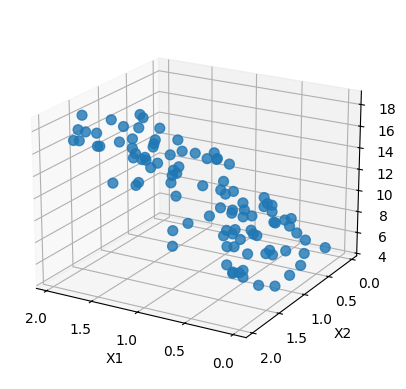

In [88]:
X12 = X[:, :2]

unique_data = np.unique(np.hstack((X12, Y)), axis=0)

# Create a 3D plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Plot unique data points
ax.scatter(unique_data[:, 0], unique_data[:, 1], unique_data[:, 2], s=50, alpha=0.8)

# Rotate the plot for better visualization
ax.view_init(elev=20, azim=120)

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show plot
plt.show()


In [89]:
W= 0.1 * np.random.rand(3,1)
learning_rate=1e-3
epochs=1000


In [90]:
def predict(X,W):
    return np.dot(X,W)

In [91]:
def MSE(X,W,Y):
    prediction=predict(X,W)
    totalcost=(1/2)*np.mean((prediction-Y)**2)
    return totalcost

In [92]:
def gradient_descent(epochs,learning_rate,X,Y,W):
    m = len(Y)

    history=[]

    for epoch in range(epochs):
        history.append(MSE(X,W,Y))
        W-=learning_rate*(1/m)*(np.dot(X.T,predict(X,W)-Y))

    print(f'Loss = {MSE(X, W, Y)}')
    plt.plot(history)
    plt.show()
    return W

Loss = 0.6801443986819082


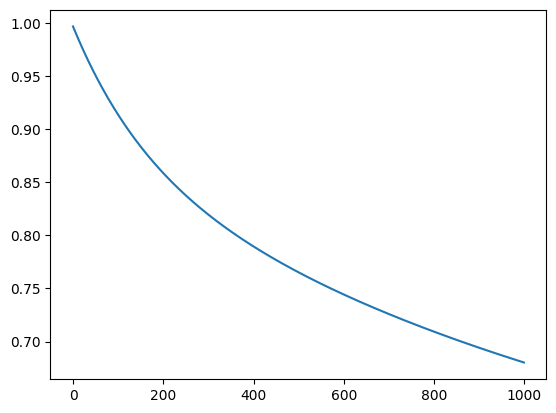

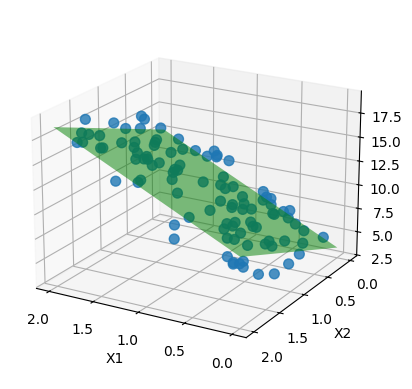

In [94]:
W=gradient_descent(epochs,learning_rate,X,Y,W)
X1_grid, X2_grid = np.meshgrid(np.linspace(0, 2, 10), np.linspace(0, 2, 10))

Y_pred_plane = W[2] + W[0] * X1_grid + W[1] * X2_grid
# Create a 3D plot
X12 = X[:, :2]

unique_data = np.unique(np.hstack((X12, Y)), axis=0)

# Create a 3D plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Plot unique data points
ax.scatter(unique_data[:, 0], unique_data[:, 1], unique_data[:, 2], s=50, alpha=0.8)
ax.plot_surface(X1_grid, X2_grid, Y_pred_plane, color='green', alpha=0.5, rstride=100, cstride=100)

# Rotate the plot for better visualization
ax.view_init(elev=20, azim=120)

# Set labels
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show plot
plt.show()